# Human Activity Recognition Analysis Project
## Dataset Description
This project utilizes a dataset loaded from "human.csv," which contains 10,900 records of sensor data collected over a two-year period, likely from multiple subjects participating in the Capital Bikeshare program or a similar human activity monitoring study in Washington D.C. Each record represents measurements taken within a one-hour window, featuring a combination of continuous sensor data and categorical labels.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import classification_report, r2_score

In [5]:
df= pd.read_csv("human.csv")
df.head(3)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1


In [6]:
# plt.figure(figsize=(10,10))
# plt.title('Data Before sampling')
# df['Activity'].value_counts().plot.bar(rot=0)

In [7]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]
data_activity_0 = data_activity_0.sample(n=40000, random_state=42)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: title={'center': 'Data after sampling'}, xlabel='Activity'>

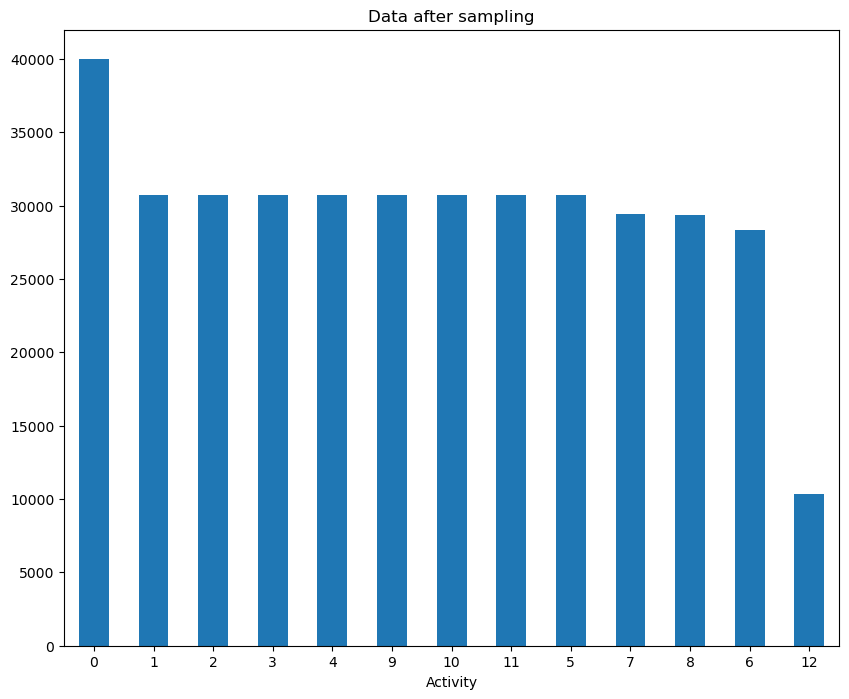

In [8]:
plt.figure(figsize=(10 ,8 ))
plt.title('Data after sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [9]:
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}


In [10]:
df


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
1212350,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.06160,0.146550,0,subject10
134482,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.76591,0.851290,0,subject1
820343,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.99795,0.521550,0,subject7
718210,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.71047,0.900860,0,subject6
118798,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.14580,0.818970,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213641,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.827110,-8.2348,-4.96520,2.48090,-0.437250,-1.01850,0.079741,12,subject10
1213642,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.827110,-21.3180,-10.21300,3.65600,-0.437250,-1.01850,0.079741,12,subject10
1213643,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.827110,-21.2970,-18.70500,4.46060,-0.437250,-1.01850,0.079741,12,subject10
1213644,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.754420,-21.1380,-18.69800,1.15880,-0.425490,-1.03700,0.084052,12,subject10


In [11]:
import matplotlib.pyplot as plt

# Filter for specific subject
subject1 = df[df['subject'] == 'subject1']

# List of sensor prefixes (e.g., 'a' for ankle, 'g' for wrist)
readings = ['a', 'g']

# Loop through each activity (1 to 12)
for i in range(1, 13):
    for r in readings:
        print(f"\n================== {activity_label[i]} - Sensor: {r} ==================")

        plt.figure(figsize=(14, 4))

        # ----- Left ankle sensor -----
        plt.subplot(1, 2, 1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color='blue', alpha=0.7, label=r + "1x")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color='red', alpha=0.7, label=r + "1y")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color='orange', alpha=0.7, label=r + "1z")
        plt.title("Left ankle sensor")
        plt.legend()

        # ----- Right wrist sensor -----
        plt.subplot(1, 2, 2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"], color='blue', alpha=0.7, label=r + "rx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"], color='red', alpha=0.7, label=r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"], color='orange', alpha=0.7, label=r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()

        plt.tight_layout()
        plt.show()


In [12]:
import matplotlib.pyplot as plt

# Filter for specific subject
subject1 = df[df['subject'] == 'subject1']

# List of sensor prefixes (e.g., 'a' for ankle, 'g' for wrist)
readings = ['a', 'g']

# Loop through each activity (1 to 12)
for i in range(1, 13):
    for r in readings:
        print(f"\n================== {activity_label[i]} - Sensor: {r} ==================")

        plt.figure(figsize=(14, 4))

        # ----- Left ankle sensor -----
        plt.subplot(1, 2, 1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color='blue', alpha=0.7, label=r + "1x")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color='red', alpha=0.7, label=r + "1y")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color='orange', alpha=0.7, label=r + "1z")
        plt.title("Left ankle sensor")
        plt.legend()

        # ----- Right wrist sensor -----
        plt.subplot(1, 2, 2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"], color='blue', alpha=0.7, label=r + "rx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"], color='red', alpha=0.7, label=r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"], color='orange', alpha=0.7, label=r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()

        plt.tight_layout()
        plt.show()


In [13]:
df['Activity'] = df['Activity'].replace(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [
        'None',
        'Standing still (1 min)',
        'Sitting and relaxing (1 min)',
        'Lying down (1 min)',
        'Walking (1 min)',
        'Climbing stairs (1 min)',
        'Waist bends forward (20x)',
        'Frontal elevation of arms (20x)',
        'Knees bending (crouching) (20x)',
        'Cycling (1 min)',
        'Jogging (1 min)',
        'Running (1 min)',
        'Jump front & back (20x)'
    ]
)


In [14]:
df["Activity"]

1212350                       None
134482                        None
820343                        None
718210                        None
118798                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [15]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

# Plot pie chart of activity distribution
plt.figure(figsize=(12, 8))

# Calculate percentage distribution and plot
(df['Activity'].value_counts(normalize=True) * 100).round(2).plot.pie(autopct='%2.1f%%')

plt.ylabel('')  # Optional: hide y-axis label
plt.title('Activity Distribution (%)')
plt.show()


In [17]:
df1 = df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df1[feature], 0.01)
    upper_range = np.quantile(df1[feature], 0.99)
    print(feature, "range:", lower_range, 'to', upper_range)

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis=0)

print('shape', df1.shape)

alx range: -11.56042 to 19.21306
aly range: -19.365 to 1.8220700000000012
alz range: -18.606 to 11.823440000000003
glx range: -0.75881 to 0.7996300000000001
gly range: -1.0394 to 0.96811
glz range: -1.0963 to 0.82711
arx range: -21.464 to 6.8239
ary range: -18.682 to 10.85
arz range: -6.409992 to 10.309659999999974
grx range: -1.0059 to 0.89412
gry range: -1.1253 to 0.92608
grz range: -0.66164 to 1.1164
shape (301450, 14)


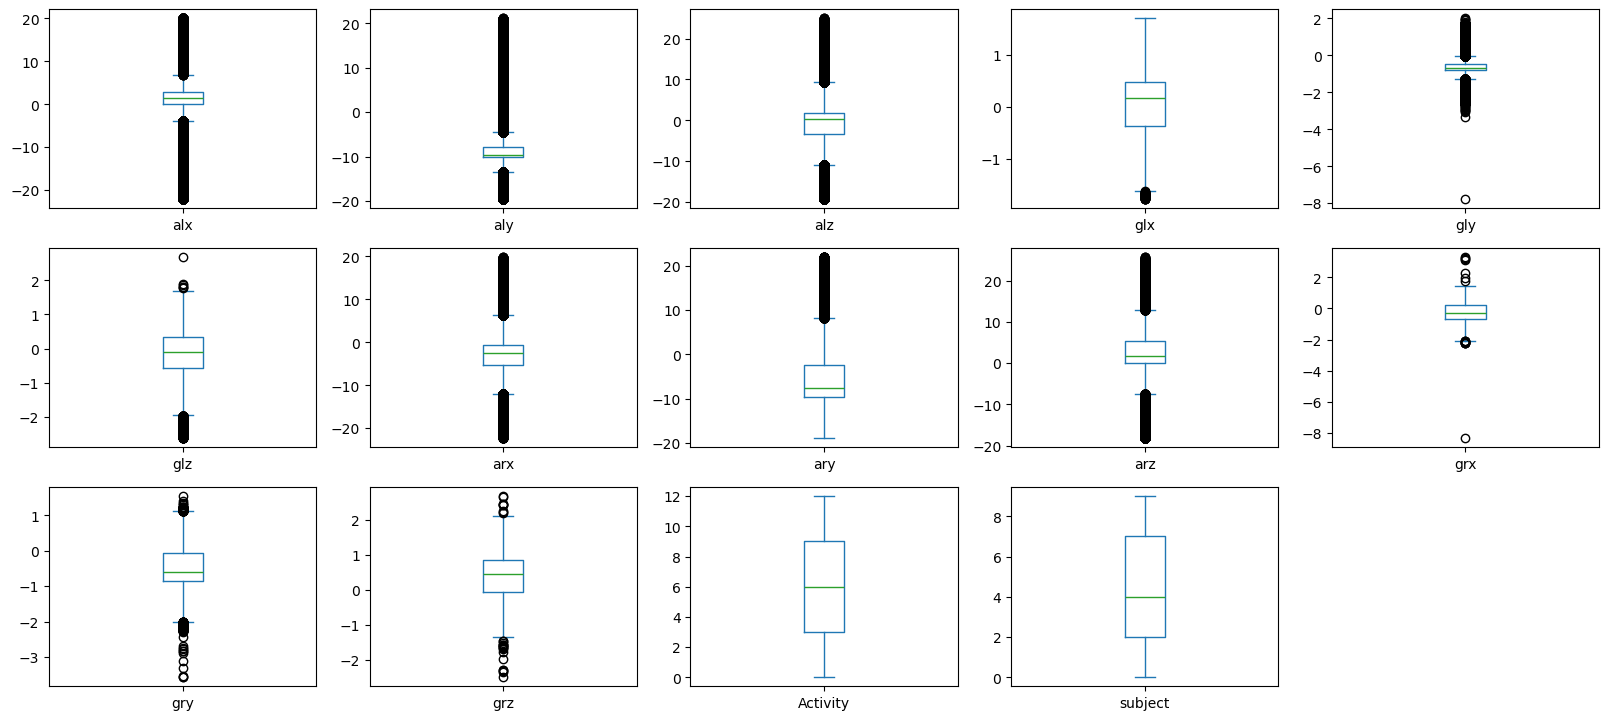

In [18]:
le = LabelEncoder()

df['subject'] = le.fit_transform(df['subject'])
df['Activity'] = le.fit_transform(df['Activity'])

df.plot(kind='box', subplots=True,layout=(5,5),figsize=(20,15))
plt.show()

In [19]:
X = df.drop(["Activity", "subject"], axis=1).values
y = df["Activity"].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

# Building Model

In [22]:
def resultsSummarizer(y_true, y_pred, cm_en=True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    if cm_en:
        plt.figure(figsize=(15, 15))
        sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=activity_label.values(),
                    yticklabels=activity_label.values())
        plt.title('Confusion Matrix')
        plt.show()
    
    print(f"Accuracy Score: " + "{:.4%}".format(acc))
    print(f"Precision Score: " + "{:.4%}".format(prec))
    print(f"Recall Score: " + "{:.4%}".format(rec))
    print(f"F1 Score: " + "{:.4%}".format(f1))

## 1.LogisticRegression()

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [24]:
lr.score(X_train, y_train)

In [25]:
lr.score(X_test, y_test)


In [26]:
lr2 = LogisticRegression()

In [27]:
lr2.fit(X_train_scaled, y_train)

In [28]:
lr2.score(X_train_scaled, y_train)

In [29]:
lr2.score(X_test_scaled, y_test)

In [30]:
y_pred_lr = lr2.predict(X_test_scaled)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Now you can use the function
resultsSummarizer(y_test, y_pred_lr)

## 2. KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV  # Added import for RandomizedSearchCV

param_dist_knn = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", random_search_knn.best_params_)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred_knn = knn1.predict(X_test)

In [35]:
resultsSummarizer(y_test, y_pred_knn)

In [37]:
from sklearn.pipeline import make_pipeline
best_knn_pipeline = make_pipeline(
    StandardScaler(),                         # Step 1: Feature scaling
    KNeighborsClassifier(
        n_neighbors=16,
        weights='uniform',
        metric='manhattan'
    )
)

# Fit the pipeline on the training data
best_knn_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_best_knn = best_knn_pipeline.predict(X_test)


In [38]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(best_knn_pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print the results
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation accuracy scores: [0.94185804 0.94230937 0.94180483 0.94098714 0.94096975]
Mean CV Accuracy: 0.9415858248820002
Standard Deviation: 0.0005260320427377893


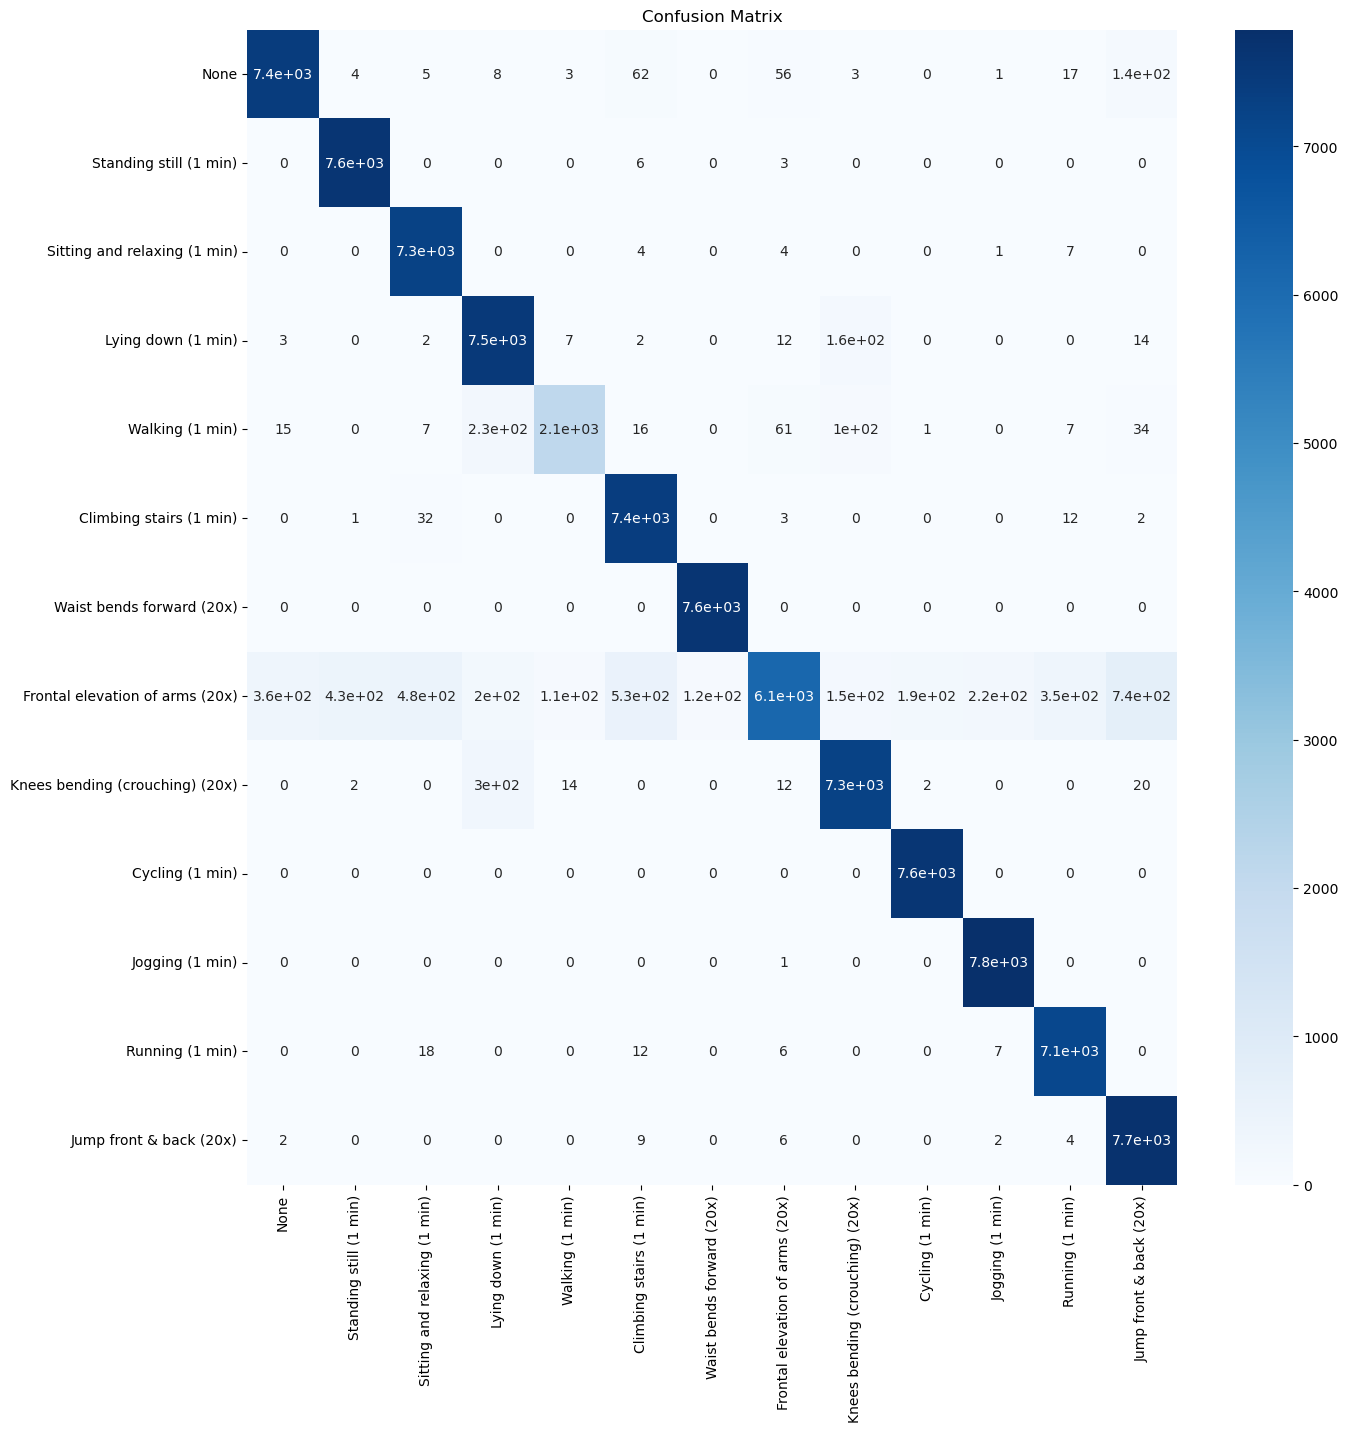

Accuracy Score: 94.4310%
Precision Score: 94.5216%
Recall Score: 94.6259%
F1 Score: 94.1612%


In [39]:
resultsSummarizer(y_test, y_pred_best_knn)

## 3. Decision Tree(with hyperparameter tunning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=14)
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


resultsSummarizer(y_test, y_pred_dt)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline: scaling (won't affect decision tree) + decision tree
best_dt_pipeline = make_pipeline(
    StandardScaler(),  # has no effect on Decision Tree, but included for consistency
    DecisionTreeClassifier(
        criterion='log_loss',
        max_depth=17,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features=None,
        random_state=42
    )
)

# Fit the model
best_dt_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_dt = best_dt_pipeline.predict(X_test)

# Evaluate
resultsSummarizer(y_test, y_pred_dt)



## 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
resultsSummarizer(y_test, y_pred_nb)

## 5. SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# LinearSVC is faster and better suited for large datasets
svc_model = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=5000, dual=False, random_state=42)
)

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
resultsSummarizer(y_test, y_pred)


In [ ]:
resultsSummarizer(y_test, y_pred_svm)

# The best model come out of all this is KNN

In [40]:
import numpy as np

def predict_knn(model_pipeline, new_sample):
  
    # Ensure input is in the right shape
    new_sample = np.array(new_sample)
    if new_sample.ndim == 1:
        new_sample = new_sample.reshape(1, -1)

    prediction = model_pipeline.predict(new_sample)
    return prediction[0]

In [42]:
# Example input (must match the number of features in your training set)
new_data_point = [5.1, 3.2, 1.3, 0.2, 2.0, 1.1, 3.0, 4.2, 1.1, 0.5, 2.6, 0.0]  # Added a 12th feature

# Predict using the trained pipeline
predicted_class = predict_knn(best_knn_pipeline, new_data_point)
print("Predicted class:", predicted_class)


Predicted class: 0


In [43]:
print("Unique target classes:", np.unique(y_train))


Unique target classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
